# Temporal Evolution

Contains temporal evolution of publications.

## ✋Set Up

### Set up GPUs

In [ ]:
# GPU information:

gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

/bin/bash: line 1: nvidia-smi: command not found


In order to use a GPU with your notebook, select the **Runtime > Change runtime** type menu, and then set the hardware accelerator dropdown to GPU.

### High RAM

In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 13.6 gigabytes of available RAM

Not using a high-RAM runtime


Users who have purchased one of Colab's paid plans have access to high-memory VMs when they are available.

You can see how much memory you have available at any time by running the following code cell. If the execution result of running the code cell below is "Not using a high-RAM runtime", then you can enable a high-RAM runtime via **Runtime > Change runtime** type in the menu. Then select High-RAM in the Runtime shape dropdown. After, re-execute the code cell.

### Install libraries

In [ ]:
# Install libraries.
!pip install --quiet numpy==1.25.2 pandas==1.5.3 plotly==5.15.0 kaleido==0.2.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 40.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.0.3, but you have pandas 1.5.3 which is incompatible.


In [ ]:
import pandas as pd
import numpy as np

import plotly.express as px
import plotly.io as pio
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from sklearn.manifold import TSNE

import kaleido
import re  # Regular expression library

import warnings
warnings.filterwarnings;

## Load Data

Import datasets, that contains full embeddings and reduced embeddings.

In [ ]:
df = pd.read_hdf('Files/embeddings_full_tSNE_uMAP_01MAR2024.h5', key='embeddings')

In [ ]:
df.head(3);

In [ ]:
# Updated color map with new categories
color_map = {
    'Cancer Research': '#1f77b4',  # muted blue
    'Plant Biology': '#ff7f0e',  # safety orange
    'Nephrology': '#2ca02c',  # cooked asparagus green
    'Endocrinology': '#d62728',  # brick red
    'Microbiology': '#9467bd',  # muted purple
    'Analytical Chemistry': '#8c564b',  # chestnut brown
    'Pharmacology': '#e377c2',  # raspberry yogurt pink
    'Neuroscience': '#7f7f7f',  # middle gray
    'Food Science & Nutrition': '#bcbd22',  # curry yellow-green
    'Toxicology': '#1a55FF',  # bright blue
    'Environmental Science': '#17becf',  # blue-teal
    'Animal Science': '#e7298a',  # dark pink
    'Sports Science & Medicine': '#66a61e',  # lime green
    'Epidemiology & Public Health': '#e6ab02',  # golden
    'Developmental Biology': '#a6761d',  # bronze
    'Aging & Gerontology': '#666666',  # dark gray
    'Immunology & Vaccine Research': '#1b9e77',  # greenish teal
    'Computational Biology': '#d95f02',  # burnt orange
    'Genetics & Genomics': '#2f4f4f',  # dark slate grey
    'unlabeled': 'rgba(0, 0, 0, 0.1)'  # Nearly transparent black, change alpha to change transparency.
}

## Embeddings X Publication Year

In [ ]:
# Ensure 'pub_year' is a numeric column
df['pub_year'] = pd.to_numeric(df['pub_year'], errors='coerce')

# Create the scatter plot with the custom color scale
fig_2d = px.scatter(df, x='tsne_2D_x', y='tsne_2D_y',
                    color='pub_year',
                    color_continuous_scale="Viridis",  # Apply the custom color scale
                    hover_data=['title'],
                    range_color=[1998, 2024])  # Set the range of years for the color scale

# Update marker size
fig_2d.update_traces(marker=dict(size=4))  # Increase default size from 3 to 4

# Update layout to hide axis names and labels, and set aesthetics
fig_2d.update_layout(
    plot_bgcolor='white',
    height=600, width=1100,
    #title="2D tSNE Embeddings with Color Coding by Publication Year",
    title_font=dict(size=24, family='Optima, sans-serif'),
    font=dict(size=18, family='Optima, sans-serif'),
    xaxis=dict(
        title='',  # Empty title for x-axis
        showticklabels=False,  # Hide x-axis tick labels
        showgrid=False  # Optional: hide grid lines for x-axis
    ),
    yaxis=dict(
        title='',  # Empty title for y-axis
        showticklabels=False,  # Hide y-axis tick labels
        showgrid=False  # Optional: hide grid lines for y-axis
    ),
    coloraxis_colorbar=dict(
        title="Publication Year",
        titleside="right"
    )
)

# Show the figure
fig_2d.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:

# Ensure 'pub_year' is a numeric column
df['pub_year'] = pd.to_numeric(df['pub_year'], errors='coerce')

# 1. Determine the color range from the ENTIRE dataset:
min_year = df['pub_year'].min()
max_year = df['pub_year'].max()

# 2. Filter out the most recent publications:
#years_to_exclude = [2024]  # Add more years to this list if needed
years_to_exclude = list(range(2010, 2025)) # 2025 is exclusive

df_filtered = df[~df['pub_year'].isin(years_to_exclude)]

# 3. Create the scatter plot using the FILTERED data but the ORIGINAL color range:
fig_2d = px.scatter(df_filtered, x='tsne_2D_x', y='tsne_2D_y',
                    color='pub_year',
                    color_continuous_scale="Viridis",
                    hover_data=['title'],
                    range_color=[min_year, max_year])  # Use min_year and max_year from the ENTIRE dataset

# Update marker size
fig_2d.update_traces(marker=dict(size=4))

# Update layout (same as your original code)
fig_2d.update_layout(
    plot_bgcolor='white',
    height=600, width=1100,
    title_font=dict(size=24, family='Optima, sans-serif'),
    font=dict(size=18, family='Optima, sans-serif'),
    xaxis=dict(
        title='',
        showticklabels=False,
        showgrid=False
    ),
    yaxis=dict(
        title='',
        showticklabels=False,
        showgrid=False
    ),
    coloraxis_colorbar=dict(
        title="Publication Year",
        titleside="right"
    )
)

# Show the figure
fig_2d.show()

In [ ]:
# Save the figure to a file
pio.write_image(fig_2d, '/content/gdrive/My Drive/current/Metabolomics Landscape/Figures/pub early years.png')  # Saves as PNG
pio.write_image(fig_2d, '/content/gdrive/My Drive/current/Metabolomics Landscape/Figures/pub early years.svg')  # Saves as SVG
#pio.write_image(fig_2d, '/content/gdrive/My Drive/code/Metabolomics Landscape/Figures/pub year.pdf')  # Saves as PDF

The early papers are predominantly in the analytical chemistry domain.  

In [ ]:
# Filter the DataFrame for the desired year range:
start_year = 1998
end_year = 2009
filtered_df = df[(df['pub_year'] >= start_year) & (df['pub_year'] <= end_year)]

# Count the occurrences of each 'predicted_category':
category_counts = filtered_df['predicted_category'].value_counts()

# Print the counts:
print(category_counts)

predicted_category
unlabeled                        1116
Analytical Chemistry              577
Plant Biology                     205
Pharmacology                      155
Microbiology                      109
Computational Biology             106
Genetics & Genomics                82
Food Science & Nutrition           72
Toxicology                         61
Cancer Research                    45
Endocrinology                      21
Environmental Science              20
Neuroscience                       18
Nephrology                          9
Animal Science                      8
Epidemiology & Public Health        7
Developmental Biology               6
Immunology & Vaccine Research       6
Aging & Gerontology                 2
Name: count, dtype: int64


## Three-year chuck evolution

In [ ]:
import pandas as pd
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Assuming 'df' is your DataFrame and 'color_map' is already defined.

# Convert 'pub_year' to numeric and drop NaN values
df['pub_year'] = pd.to_numeric(df['pub_year'], errors='coerce')
df = df.dropna(subset=['pub_year'])

# Find the range of publication years
min_year = int(df['pub_year'].min())
max_year = int(df['pub_year'].max())

# Calculate the number of years per chunk to cover the range with 9 chunks
total_years = max_year - min_year + 1  # Plus one to include both the first and the last year in the range
years_per_chunk = total_years / 9

# Generate the time chunks, ensuring that each chunk is an integer number of years
time_chunks = [(min_year + round(i * years_per_chunk), min_year + round((i + 1) * years_per_chunk) - 1) for i in range(9)]
# Adjust the last chunk to include the max_year
time_chunks[-1] = (time_chunks[-1][0], max_year)

# Create subplots with 3 rows and 3 columns
fig = make_subplots(rows=3, cols=3, subplot_titles=[f"{start}-{end}" for start, end in time_chunks])

# Keep track of categories already added to legend
legend_added = set()

# Iterate over time periods and add a scatter plot for each
for i, (start, end) in enumerate(time_chunks):
    # Filter the dataframe for the time period
    df_period = df[(df['pub_year'] >= start) & (df['pub_year'] <= end)].copy()

    # Map the 'predicted_category' to the colors defined in color_map
    df_period['color'] = df_period['predicted_category'].map(color_map)

    # Get unique categories in this period
    unique_categories = df_period['predicted_category'].unique()

    # Create a scatter plot for each category
    for category in unique_categories:
        df_category = df_period[df_period['predicted_category'] == category]
        trace = go.Scatter(
            x=df_category['tsne_2D_x'],
            y=df_category['tsne_2D_y'],
            mode='markers',
            marker=dict(size=4, color=df_category['color']),  # Increase default size from 3 to 4
            name=category,
            showlegend=category not in legend_added
        )
        legend_added.add(category)

        # Calculate row and col for subplot for a 3x3 grid
        row = (i // 3) + 1
        col = (i % 3) + 1
        fig.add_trace(trace, row=row, col=col)

# Update layout to accommodate all subplots and hide axis labels
fig.update_layout(
    plot_bgcolor='white',
    height=900, width=1200,
    title_text="2D t-SNE Embeddings of Metabolomics Papers",
    title_font=dict(size=24, family='Optima, sans-serif'),
    font=dict(size=18, family='Optima, sans-serif')
)

# Iterate over each subplot and update the x and y axis settings
for i in range(1, 4):
    for j in range(1, 4):
        fig.update_xaxes(row=i, col=j, showticklabels=False, showgrid=False, title='')
        fig.update_yaxes(row=i, col=j, showticklabels=False, showgrid=False, title='')

# Show the figure
fig.show()

In [ ]:
# Save the figure to a file
pio.write_image(fig, '/content/gdrive/My Drive/code/Metabolomics Landscape/Figures/research_field_time_chunk.png')  # Saves as PNG
pio.write_image(fig, '/content/gdrive/My Drive/code/Metabolomics Landscape/Figures/research_field_time_chunk.svg')  # Saves as SVG

## Temporal evolution GIF

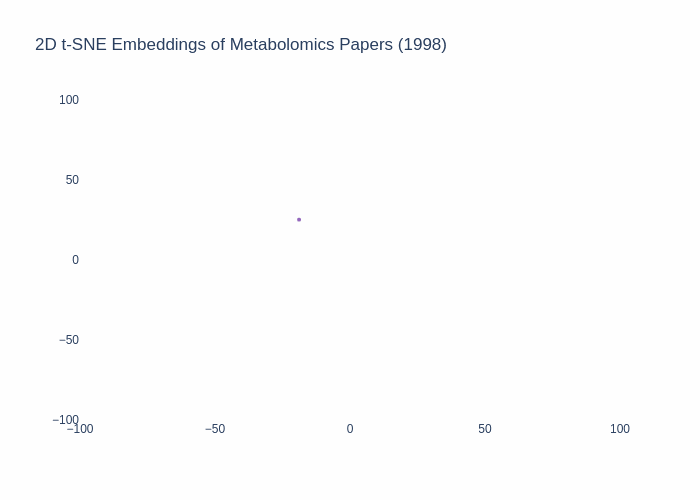

In [ ]:
import pandas as pd
import plotly.graph_objs as go
from plotly.subplots import make_subplots

import os
import imageio
from IPython.display import Image

# Create directory to save images
os.makedirs('embeddings_over_time_gif', exist_ok=True)

# Assuming 'df' is your DataFrame and 'color_map' is already defined.

# Convert 'pub_year' to numeric and drop NaN values
df['pub_year'] = pd.to_numeric(df['pub_year'], errors='coerce')
df = df.dropna(subset=['pub_year'])

# Find the range of publication years
min_year = int(df['pub_year'].min())
max_year = int(df['pub_year'].max())

# Create subplots with 9 rows and 3 columns
fig = make_subplots(rows=9, cols=3, subplot_titles=[str(year) for year in range(min_year, max_year + 1)])

# Iterate over each year
for year in range(min_year, max_year + 1):
    # Filter the dataframe for the current year
    df_year = df[df['pub_year'] == year].copy()  # Create a copy to avoid SettingWithCopyWarning

    # Map the 'predicted_category' to the colors defined in color_map
    df_year['color'] = df_year['predicted_category'].map(color_map)

    # Get unique categories in this year
    unique_categories = df_year['predicted_category'].unique()

    fig = go.Figure()
    # Create a scatter plot for each category
    for category in unique_categories:
        df_category = df_year[df_year['predicted_category'] == category]
        fig.add_trace(go.Scatter(
            x=df_category['tsne_2D_x'],
            y=df_category['tsne_2D_y'],
            mode='markers',
            marker=dict(size=4, color=df_category['color']),
            name=category,
        ))

    fig.update_layout(
        title=f"2D t-SNE Embeddings of Metabolomics Papers ({year})",
        plot_bgcolor='white',
        xaxis_range=[-100, 100],  # Set x-axis range
        yaxis_range=[-100, 100]   # Set y-axis range
        )
    # Save the figure as an image
    fig.write_image(f'embeddings_over_time_gif/tsne_embeddings_{year}.png')

# Create GIF from images
image_files = sorted(os.listdir('embeddings_over_time_gif'))
images = [imageio.v2.imread(f'embeddings_over_time_gif/{file}') for file in image_files]
imageio.mimsave('embeddings_over_time.gif', images, fps=1)

# Display the GIF
Image(filename='embeddings_over_time.gif')